# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

# Resources to understand the data:
WHAT IS A VERIFIED REVIEW?
Our editorial staff have inspected a copy of an e-ticket, booking details or a boarding pass, with the customer name confirming the trip written about in the review. We rely upon user’s honesty in providing this information. A Trip Verified review is shown with the ✅ symbol.

WHAT DOES UNVERIFIED MEAN?
The ❎ Unverified review symbol is shown for comments posted where the user has been unable to, or does not wish to Verify their review (as explained above). The comments have been subjected to the usual manual checks by our Editorial staff, but the review authenticity cannot be verified.

https://www.airlinequality.com/verified-reviews/


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#Added libraries
from textblob import TextBlob
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
def extract_star_rating(element):
    """Utility function to extract star ratings based on filled stars."""
    if element:
        return len(element.find_all("span", class_="star fill"))
    return None

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

stars = []
date = []
country = []
Type_Of_Traveller = []
Seat_Type = []
Route = []
Date_Flown = []
Seat_Comfort = []
Cabin_Staff_Service = []
Food_Beverages = []
Inflight_Entertainment = []
Ground_Service = []
Wifi_Connectivity = []
Value_For_Money = []
Recommended = []
reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')

    for review in soup.find_all("article", itemprop="review"):
        stars.append(len(review.find_all("span", class_="star fill")))
        date.append(review.find("time").get_text(strip=True))
        author_detail = review.find("span", itemprop="name")

        if author_detail:
            country_data = author_detail.next_sibling
            if isinstance(country_data, str):  # Check if the next sibling is a string
                country.append(country_data.strip(" ()"))
            else:
                country.append(None)
        else:
            country.append(None)


        details = {}
        for item in review.find_all("tr"):
            header = item.find("td", class_="review-rating-header")

            # Check if this category uses stars for ratings or direct values
            star_rating = item.find("td", class_="review-rating-stars")

            value = item.find("td", class_="review-value")

            if header:
              if star_rating:
                details[header.get_text(strip=True)] = extract_star_rating(star_rating)
              elif value:
                details[header.get_text(strip=True)] = value.get_text(strip=True)

        Type_Of_Traveller.append(details.get('Type Of Traveller', None))
        Seat_Type.append(details.get('Seat Type', None))
        Route.append(details.get('Route', None))
        Date_Flown.append(details.get('Date Flown', None))
        Seat_Comfort.append(details.get('Seat Comfort', None))
        Cabin_Staff_Service.append(details.get('Cabin Staff Service', None))
        Food_Beverages.append(details.get('Food & Beverages', None))
        Inflight_Entertainment.append(details.get('Inflight Entertainment', None))
        Ground_Service.append(details.get('Ground Service', None))
        Wifi_Connectivity.append(details.get('Wifi & Connectivity', None))
        Value_For_Money.append(details.get('Value For Money', None))
        Recommended.append(details.get('Recommended', None))

        # Extracting the main review content
        review_content = review.find("div", itemprop="reviewBody")
        if review_content:
            reviews.append(review_content.get_text(strip=True))
        else:
            reviews.append(None)

# Display lengths
print("Length of stars:", len(stars))
print("Length of date:", len(date))
print("Length of country:", len(country))
print("Length of Type_Of_Traveller:", len(Type_Of_Traveller))
print("Length of Seat_Type:", len(Seat_Type))
print("Length of Route:", len(Route))
print("Length of Date_Flown:", len(Date_Flown))
print("Length of Seat_Comfort:", len(Seat_Comfort))
print("Length of Cabin_Staff_Service:", len(Cabin_Staff_Service))
print("Length of Food_Beverages:", len(Food_Beverages))
print("Length of Inflight_Entertainment:", len(Inflight_Entertainment))
print("Length of Ground_Service:", len(Ground_Service))
print("Length of Wifi_Connectivity:", len(Wifi_Connectivity))
print("Length of Value_For_Money:", len(Value_For_Money))
print("Length of Recommended:", len(Recommended))
print("Length of reviews:", len(reviews))


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
Scraping page 51
Scraping page 52
Scraping page 53
Scraping page 54
Scraping page 55
Scraping page 56
Scraping page 57
Scraping page 58
Scraping page 59
Scrapi

In [ ]:
df = pd.DataFrame({
    "reviews": reviews,
    "stars": stars,
    "date": date,
    "country": country,
    "Type Of Traveller": Type_Of_Traveller,
    "Seat Type": Seat_Type,
    "Route": Route,
    "Date Flown": Date_Flown,
    "Seat Comfort": Seat_Comfort,
    "Cabin Staff Service": Cabin_Staff_Service,
    "Food & Beverages": Food_Beverages,
    "Inflight Entertainment": Inflight_Entertainment,
    "Ground Service": Ground_Service,
    "Wifi & Connectivity": Wifi_Connectivity,
    "Value For Money": Value_For_Money,
    "Recommended": Recommended
})

df.head()

,reviews,stars,date,country,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,✅Trip Verified| BA has a real problem with b...,7,10th October 2023,None,Solo Leisure,Economy Class,Berlin to London,October 2023,3.0,1.0,1.0,NaN,1.0,NaN,1,no
1,✅Trip Verified| Our connecting flight from Lon...,19,8th October 2023,None,Couple Leisure,Economy Class,Atlanta to Glasgow via London,September 2023,3.0,3.0,1.0,4.0,1.0,4.0,3,no
2,✅Trip Verified| The worst airline I have eve...,7,7th October 2023,None,Couple Leisure,Economy Class,Singapore to Sydney,October 2023,1.0,1.0,2.0,1.0,1.0,NaN,1,no
3,"✅Trip Verified| Excellent service levels, pr...",34,7th October 2023,None,Solo Leisure,First Class,London to New York JFK,October 2023,5.0,5.0,5.0,4.0,5.0,5.0,5,yes
4,Not Verified| Booked a very special holiday f...,7,5th October 2023,None,Couple Leisure,Business Class,Heathrow to Marseille,August 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no


In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
# Clean Data

# Load the CSV file
df = pd.read_csv('/content/data/BA_reviews.csv')

# Create the "Trip Verified" column
df['Trip Verified'] = df['reviews'].apply(lambda x: 1 if "✅Trip Verified" in x else 0)

# Clean up the reviews column by removing both "✅Trip Verified|" and "Not Verified|"
df['reviews'] = df['reviews'].str.replace("✅Trip Verified|", "", regex=False)
df['reviews'] = df['reviews'].str.replace("Not Verified|", "", regex=False)

# Save the cleaned data back to the CSV or to a new file
df.to_csv('/content/data/Cleaned_BA_reviews.csv', index=False)


print(df.head())


   Unnamed: 0                                            reviews  stars  \
0           0     BA has a real problem with boarding it's fl...      7   
1           1   Our connecting flight from London to Glasgow ...     19   
2           2     The worst airline I have ever flown with. A...      7   
3           3     Excellent service levels, proactive crew an...     34   
4           4    Booked a very special holiday for me and my ...      7   

                date  country Type Of Traveller       Seat Type  \
0  10th October 2023      NaN      Solo Leisure   Economy Class   
1   8th October 2023      NaN    Couple Leisure   Economy Class   
2   7th October 2023      NaN    Couple Leisure   Economy Class   
3   7th October 2023      NaN      Solo Leisure     First Class   
4   5th October 2023      NaN    Couple Leisure  Business Class   

                           Route      Date Flown  Seat Comfort  \
0               Berlin to London    October 2023           3.0   
1  Atlanta to 

In [ ]:
# Sentiment Analysis
# Load the cleaned CSV file
df = pd.read_csv('/content/data/Cleaned_BA_reviews.csv')

# Calculate polarity for each review
df['polarity'] = df['reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['polarity'].apply(categorize_sentiment)

# Count the number of each sentiment
print(df['sentiment'].value_counts())

# Save the updated DataFrame to a new CSV file
df.to_csv('/content/data/BA_reviews_with_sentiment.csv', index=False)

positive    2575
negative    1079
neutral       17
Name: sentiment, dtype: int64


The polarity score in sentiment analysis, especially in tools like TextBlob, is typically derived from a technique called **"lexical sentiment analysis"**. Here's an overview of how it's calculated:

1. **Lexicon Creation**:
    - A lexicon is a list or dictionary of predefined words/phrases along with their associated sentiment scores. These scores are usually determined based on human annotations.
    - For example, the word "good" might be given a positive score, like +0.5, whereas "bad" might get a negative score, such as -0.5.

2. **Tokenization**:
    - The input text (e.g., a review) is broken down into individual tokens, typically words. This process is called tokenization.

3. **Score Calculation**:
    - Each token in the input text is matched against the lexicon. If a token is found in the lexicon, its sentiment score is retrieved.
    - Polarity is calculated by summing up all the individual sentiment scores for the tokens and then dividing by the number of tokens. This gives an average sentiment score for the text.
    - For instance, consider the text: "The service is good but the food is bad." If "good" has a score of +0.5 and "bad" has a score of -0.5, then the polarity for the entire sentence is \( \frac{(+0.5) + (-0.5)}{2} = 0 \).

4. **Normalization**:
    - Depending on the implementation, the final sentiment score might be normalized to lie between -1 and 1.

5. **Adjustments and Context**:
    - Some advanced lexicons and algorithms can factor in intensifiers and diminishers. For example, "very good" might have a higher positive score than just "good".
    - Contextual adjustments might be made. For instance, "not good" would ideally reverse the sentiment of "good".

6. **Aggregation**:
    - The calculated polarity scores for all tokens in the text are then aggregated (typically averaged) to produce a single polarity score for the entire text.

It's worth noting that while this lexical approach is simple and computationally efficient, it doesn't capture more complex linguistic structures or the nuances of sentiment as effectively as some other methods, like machine learning-based sentiment analysis. Machine learning models, especially deep learning ones, can be trained on large annotated datasets to recognize sentiment based on patterns in the text rather than relying on a predefined lexicon.

In [ ]:
# Load the data
df = pd.read_csv('/content/data/BA_reviews_with_sentiment.csv')

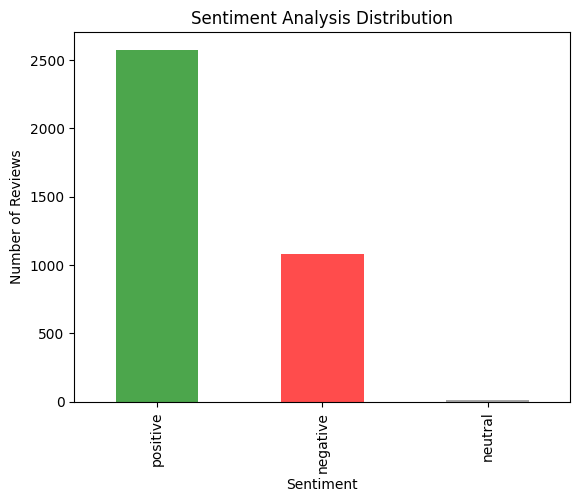

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'], alpha=0.7)
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


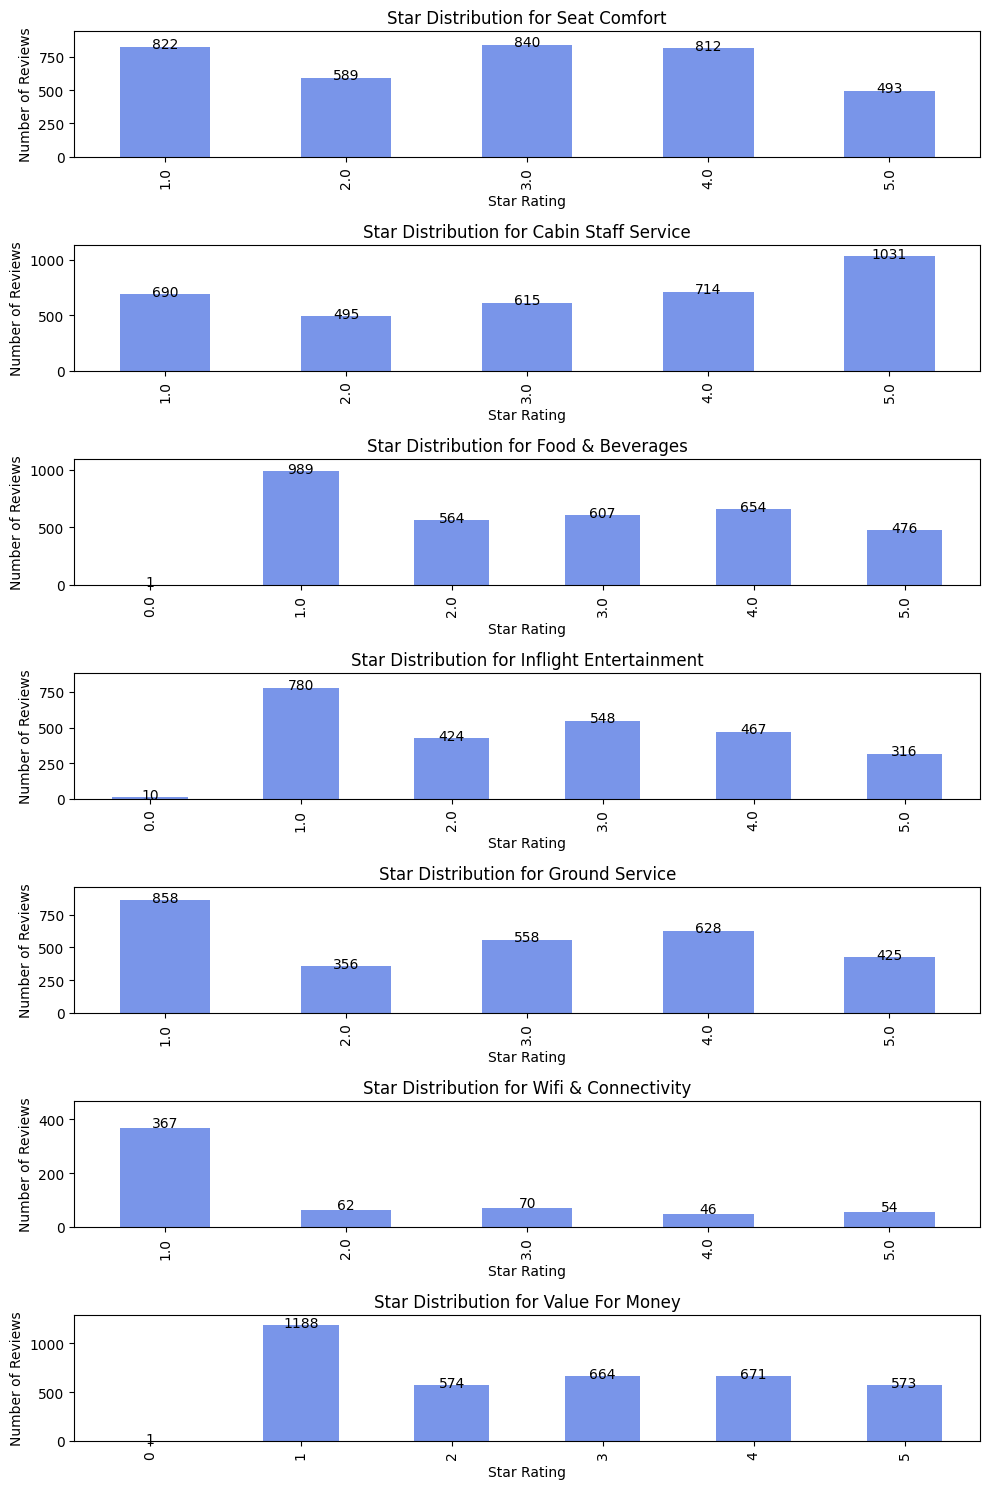

In [ ]:
categories = [
    "Seat Comfort", "Cabin Staff Service", "Food & Beverages",
    "Inflight Entertainment", "Ground Service", "Wifi & Connectivity",
    "Value For Money"
]

# Create a subplots grid
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(10, 15))

for ax, category in zip(axes, categories):
    # Plotting the bar chart
    df[category].value_counts().sort_index().plot(kind='bar', ax=ax, color='royalblue', alpha=0.7)
    ax.set_title(f'Star Distribution for {category}')
    ax.set_xlabel('Star Rating')
    ax.set_ylabel('Number of Reviews')
    ax.set_ylim(0, df[category].value_counts().max() + 100)  # adjust ylim for better visualization

    # Annotating the bar charts with the actual counts
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 20),
                    ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Economy Class
First Class
Business Class
Premium Economy
nan


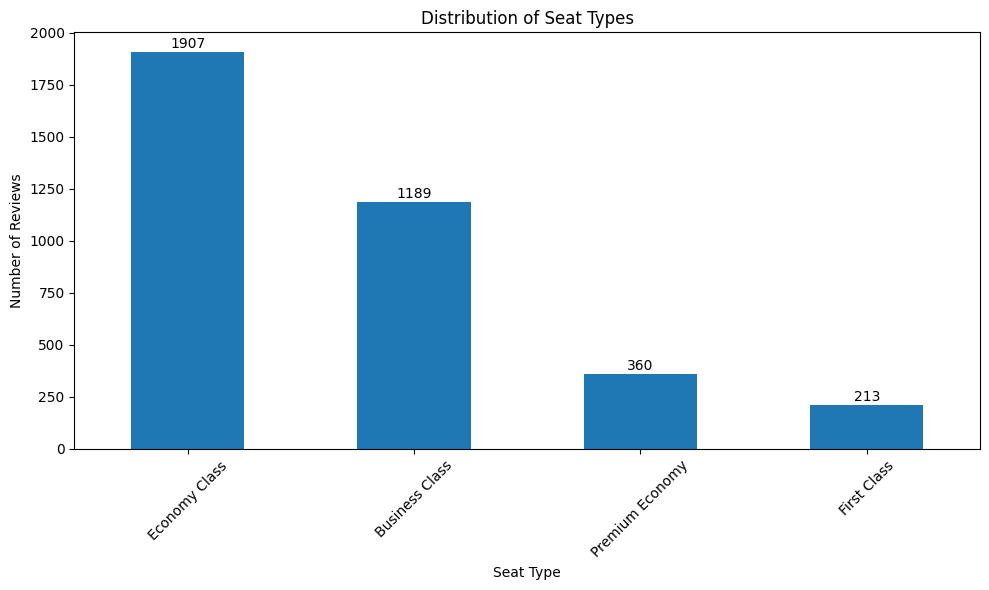

In [ ]:
# Get unique seat types
unique_seat_types = df["Seat Type"].unique()

# Print the unique seat types
for seat_type in unique_seat_types:
    print(seat_type)

# Count occurrences of each seat type
seat_type_counts = df["Seat Type"].value_counts()

# Plot
plt.figure(figsize=(10,6))
seat_type_counts.plot(kind='bar')
plt.title('Distribution of Seat Types')
plt.xlabel('Seat Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

# Annotate with the actual count
for i, v in enumerate(seat_type_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Load the cleaned dataset
df = pd.read_csv("/content/data/Cleaned_BA_reviews.csv")

# Ensure that numeric columns are treated as such
numeric_columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

seat_types = df['Seat Type'].dropna().unique()

result = {}

for seat in seat_types:
    filtered_df = df[df['Seat Type'] == seat]

    category_scores = {}

    for cat in numeric_columns:
        avg_score = filtered_df[cat].mean()
        category_scores[cat] = round(avg_score, 2)

    recommended_yes = len(filtered_df[filtered_df['Recommended'] == 'yes'])
    recommended_no = len(filtered_df[filtered_df['Recommended'] == 'no'])

    result[seat] = {
        'Category Scores': category_scores,
        'Recommended': {
            'yes': recommended_yes,
            'no': recommended_no
        }
    }

for seat, data in result.items():
    print(f"{seat}:")
    for cat, score in data['Category Scores'].items():
        print(f"\t{cat} avg: {score}")
    print(f"\tRecommended -> yes: {data['Recommended']['yes']} no: {data['Recommended']['no']}\n")


Economy Class:
	Seat Comfort avg: 2.73
	Cabin Staff Service avg: 3.07
	Food & Beverages avg: 2.49
	Inflight Entertainment avg: 2.49
	Ground Service avg: 2.65
	Wifi & Connectivity avg: 1.76
	Value For Money avg: 2.6
	Recommended -> yes: 693 no: 1214

First Class:
	Seat Comfort avg: 3.69
	Cabin Staff Service avg: 3.94
	Food & Beverages avg: 3.24
	Inflight Entertainment avg: 3.08
	Ground Service avg: 3.16
	Wifi & Connectivity avg: 1.94
	Value For Money avg: 3.08
	Recommended -> yes: 105 no: 108

Business Class:
	Seat Comfort avg: 2.91
	Cabin Staff Service avg: 3.46
	Food & Beverages avg: 2.95
	Inflight Entertainment avg: 2.69
	Ground Service avg: 2.93
	Wifi & Connectivity avg: 2.1
	Value For Money avg: 2.77
	Recommended -> yes: 545 no: 644

Premium Economy:
	Seat Comfort avg: 3.04
	Cabin Staff Service avg: 3.12
	Food & Beverages avg: 2.69
	Inflight Entertainment avg: 2.78
	Ground Service avg: 2.9
	Wifi & Connectivity avg: 2.19
	Value For Money avg: 2.68
	Recommended -> yes: 146 no: 214



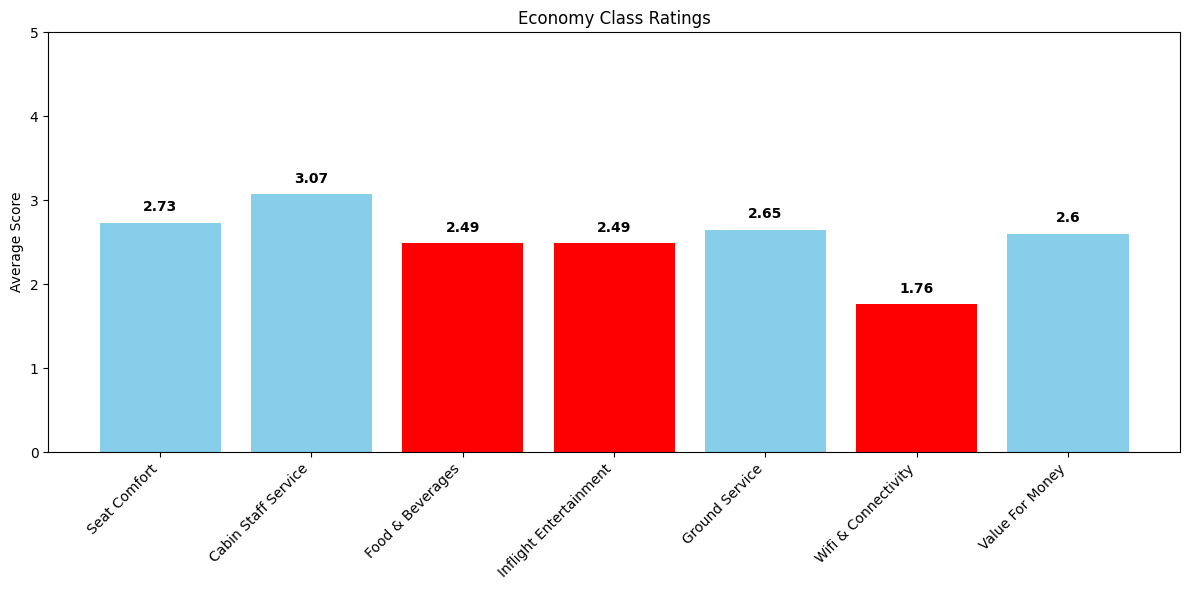

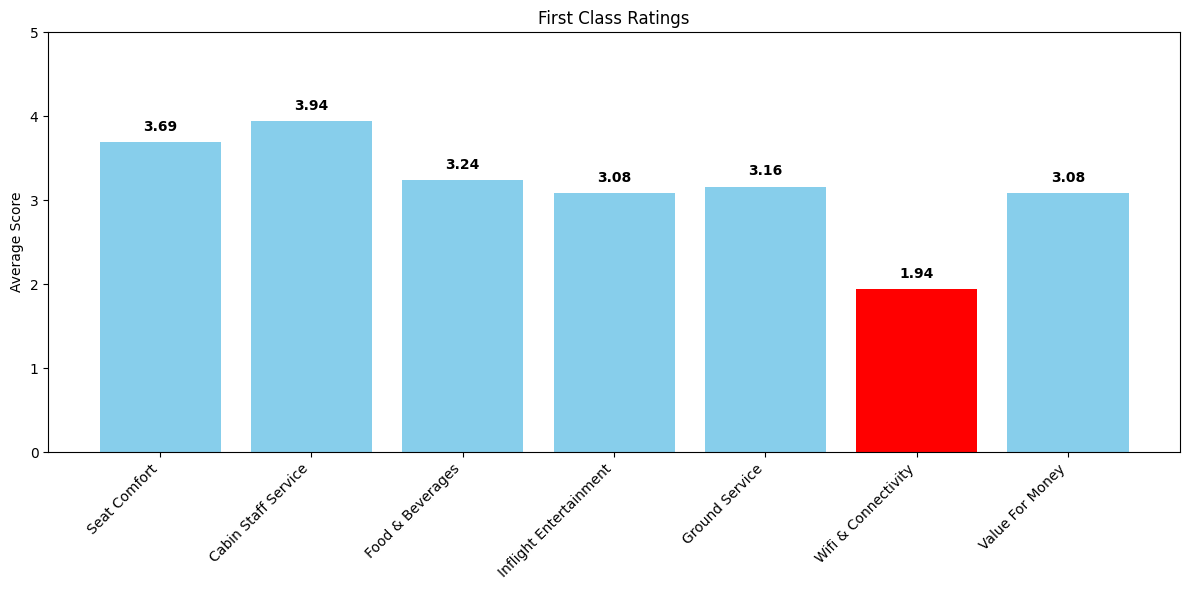

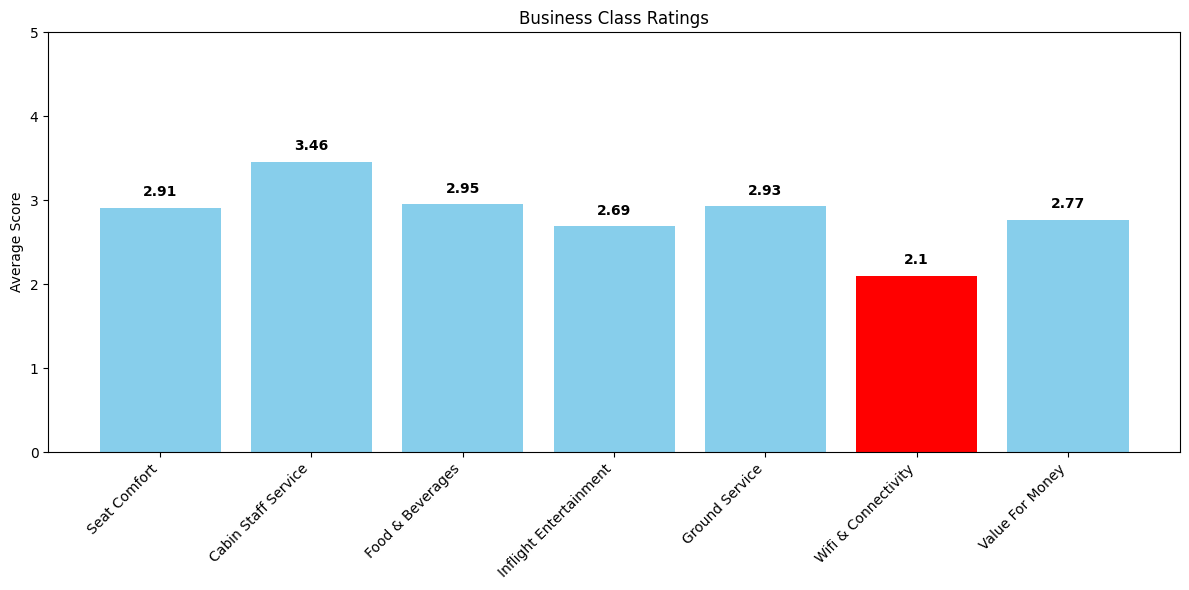

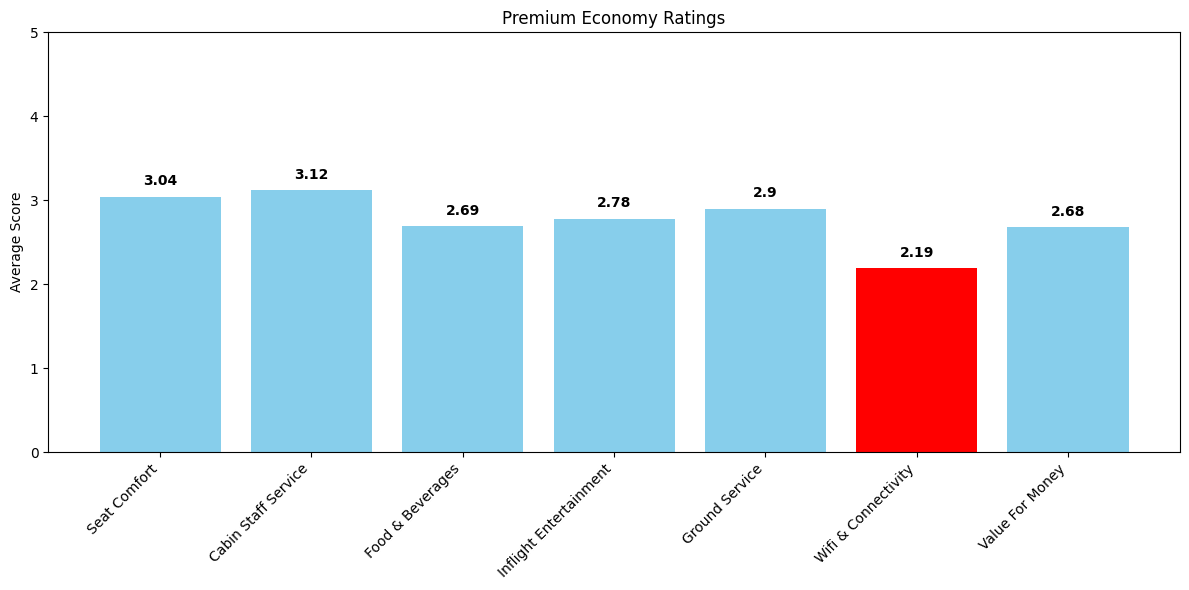

In [ ]:
# Define the categories
categories = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

for seat, data in result.items():
    scores = [data['Category Scores'][cat] for cat in categories]

    # Determine the color of the bars based on their values
    colors = ['red' if score < 2.5 else 'skyblue' for score in scores]

    plt.figure(figsize=(12,6))
    plt.bar(categories, scores, color=colors)
    plt.title(f'{seat} Ratings')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 5)  # Assuming ratings are out of 5
    for i, v in enumerate(scores):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()


In [ ]:
traveler_types = df['Type Of Traveller'].value_counts()
print("Type of Traveler:")
for traveler, count in traveler_types.items():
    print(f"\t{traveler}: {count} reviews")

Type of Traveler:
	Couple Leisure: 983 reviews
	Solo Leisure: 882 reviews
	Business: 638 reviews
	Family Leisure: 397 reviews


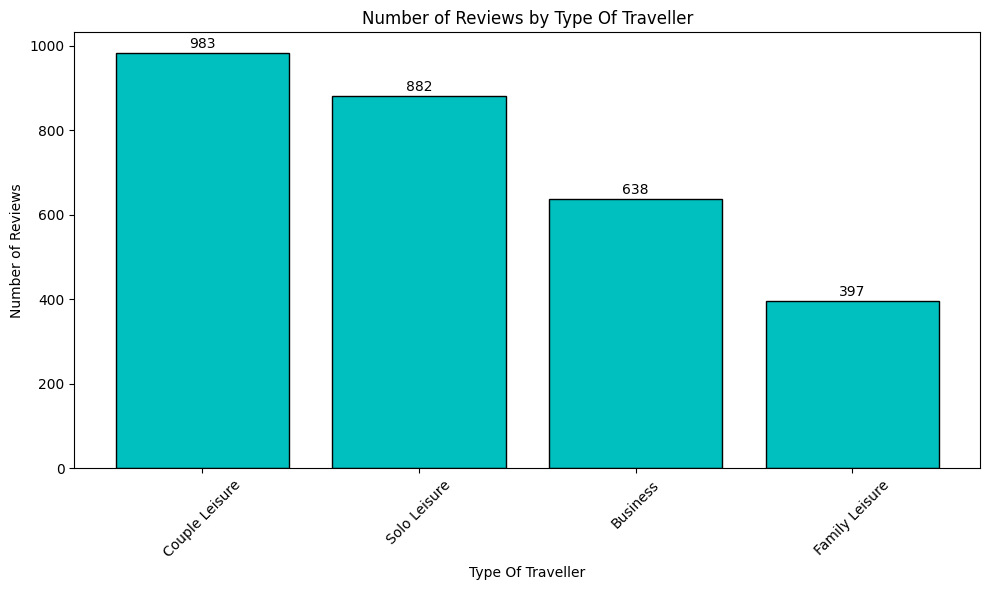

In [ ]:
traveler_types = df['Type Of Traveller'].value_counts()

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(traveler_types.index, traveler_types.values, color='c', edgecolor='black')
plt.title('Number of Reviews by Type Of Traveller')
plt.xlabel('Type Of Traveller')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

plt.show()

Type Of Traveller
Business          232
Couple Leisure    307
Family Leisure    135
Solo Leisure      239
Name: bad_review, dtype: int64


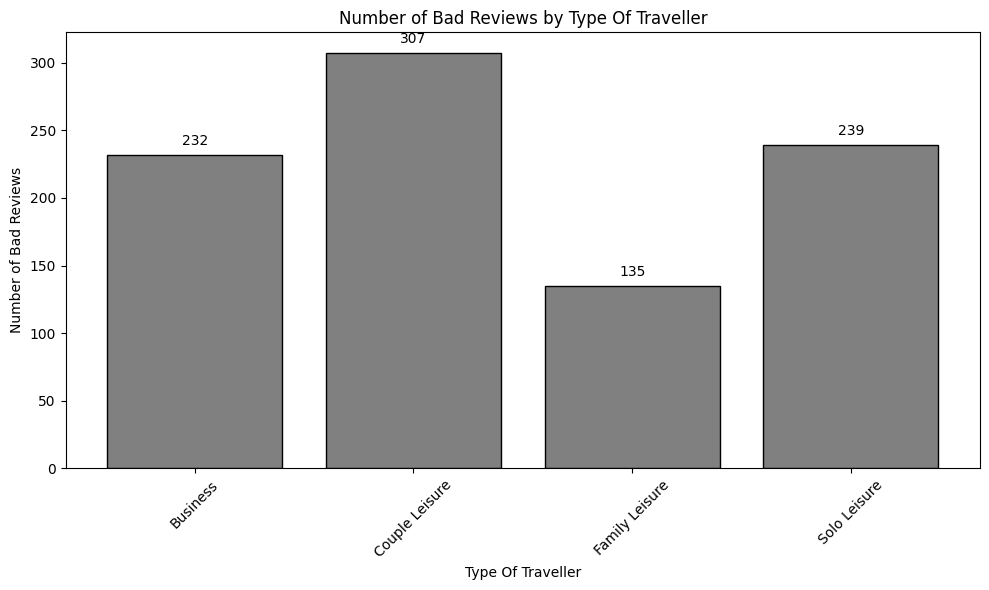

In [ ]:
df = pd.read_csv('/content/data/BA_reviews_with_sentiment.csv')
# Assuming you've already calculated the polarity and added it as a column called "polarity"
df['bad_review'] = df['polarity'] < 0

bad_reviews_by_traveler = df.groupby('Type Of Traveller')['bad_review'].sum().astype(int)

print(bad_reviews_by_traveler)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bars = plt.bar(bad_reviews_by_traveler.index, bad_reviews_by_traveler.values, color='gray', edgecolor='black')
plt.title('Number of Bad Reviews by Type Of Traveller')
plt.xlabel('Type Of Traveller')
plt.ylabel('Number of Bad Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

plt.show()



In [ ]:
total_reviews = len(df)

print(f"Total number of reviews: {total_reviews}")


Total number of reviews: 3671


In [ ]:
# Load the data
df = pd.read_csv('/content/data/BA_reviews_with_sentiment.csv')

# Filter rows for Economy class and where the word "Refund" appears in the reviews
refund_in_economy = df[(df['Seat Type'] == 'Economy Class') & (df['reviews'].str.contains('Refund', case=False, na=False))]

# Count the number of such rows
count_refund = len(refund_in_economy)

# Compute the average Ground Service rating for these rows
avg_ground_service = refund_in_economy['Ground Service'].mean()

print(f"Number of times the word 'Refund' appears in Economy Class reviews: {count_refund}")
print(f"Average Ground Service rating when 'Refund' is mentioned in Economy Class reviews: {avg_ground_service:.2f} stars")


Number of times the word 'Refund' appears in Economy Class reviews: 118
Average Ground Service rating when 'Refund' is mentioned in Economy Class reviews: 1.51 stars
